## Capstone 2

In [48]:
import pandas as pd
import re

In [49]:
df = pd.read_csv('data/nlp-getting-started/train.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [51]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [52]:
#Feature - tweet length
df['tweet_length'] = df['text'].str.len()

In [58]:
def word_count(text):
    words = text.split()
    return len(words)

In [59]:
df['num_words'] = df['text'].apply(word_count)

In [61]:
def avg_word_length(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    avg_word_length = sum(word_lengths)/len(words)
    return avg_word_length

In [62]:
df['avg_word_length'] = df['text'].apply(avg_word_length)

In [75]:
def hashtag_count(text):
    words = text.split()
    hashtags = [word for word in words if word.startswith('#')]
    return len(hashtags)

In [76]:
df['hashtag_count'] = df['text'].apply(hashtag_count)

In [78]:
def mention_count(text):
    words = text.split()
    hashtags = [word for word in words if word.startswith('@')]
    return len(hashtags)

In [79]:
df['mention_count'] = df['text'].apply(mention_count)

In [87]:
def excl_count(text):
    words = text.split()
    excl = [word for word in words if word.__contains__('!')]
    return len(excl)

In [88]:
df['exclamation_count'] = df['text'].apply(excl_count)

In [92]:
##How to do a count of all uppercase words. Example, FIRE! returns 1 but Fire! returns 0

In [91]:
df.head()

,id,keyword,location,text,target,tweet_length,num_words,avg_word_length,hashtag_count,mention_count,exclamation_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,2,0,0


In [104]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist

In [131]:
stop_words = stopwords.words('english')
newWords = ['http','https', 'amp', 'cc', 'rt', 'nan']
stop_words.extend(newWords)

def preprocess(text):
    
    text = re.sub(r'http.?//[^s]+[\s]?|https.?//[^s]+[\s]?','',text) #Removes URLs
    text = re.sub(r'@\w+','', text) #Removes nametags
    text = text.lower() #lowercase all words    
    
    def lemmatize(text):
        lemmatizer = WordNetLemmatizer()
        lemmatized_output = ' '.join(lemmatizer.lemmatize(x, 'v') for x in word_tokenize(text))
        return lemmatized_output
    
    text = lemmatize(text)

    text = re.sub(r'[^a-zA-Z]',' ', text) #remove random symbols and numbers in string
    
    def remove_stopwords(text):
        token = word_tokenize(text)
        remove_short = [x for x in token if len(x)>2 ] #remove words that are shorter than 2 letters
        remove_output = ' '.join(x for x in remove_short if x not in stop_words) #remove stopwords and put sentence back together
        
        return remove_output
    
    text = remove_stopwords(text)
    
#    text = word_tokenize(text) #tokenize words
    return text

In [132]:
clean2 = df.text[100]
print('Original:',clean2)
print()
print('Cleaned:', preprocess(clean2))

Original: .@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad

Cleaned: bahrain police previously die road accident kill explosion


In [133]:
df['clean_text'] = df['text'].apply(preprocess)

In [134]:
#Do I replace NaN values? I would need to do this for location as well

df['clean_keyword'] = df['keyword'].astype(str).apply(preprocess) 

In [136]:
df['clean_location'] = df['location'].astype(str).apply(preprocess)

In [142]:
df.head(5)

,id,keyword,location,text,target,tweet_length,num_words,avg_word_length,hashtag_count,mention_count,exclamation_count,clean_text,clean_keyword,clean_location
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,1,0,0,deeds reason earthquake may allah forgive,,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,0,0,0,forest fire near ronge sask canada,,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,0,0,0,residents ask shelter place notify officer eva...,,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,1,0,0,people receive wildfires evacuation order cali...,,
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,2,0,0,get send photo ruby alaska smoke wildfires pou...,,


In [143]:
import nltk
nltk.download('averaged_perceptron_tagger')
  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/brandon.arcilla/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [172]:
def parts_of_speech(text):
    text = word_tokenize(text)
    text = nltk.pos_tag(text)
    return (text)

In [173]:
df['text'].apply(parts_of_speech)

0       [(Our, PRP$), (Deeds, NNS), (are, VBP), (the, ...
1       [(Forest, NNP), (fire, NN), (near, IN), (La, N...
2       [(All, DT), (residents, NNS), (asked, VBD), (t...
3       [(13,000, CD), (people, NNS), (receive, JJ), (...
4       [(Just, RB), (got, VBN), (sent, VBD), (this, D...
                              ...                        
7608    [(Two, CD), (giant, JJ), (cranes, NNS), (holdi...
7609    [(@, JJ), (aria_ahrary, JJ), (@, NN), (TheTawn...
7610    [(M1.94, NNP), ([, VBD), (01:04, CD), (UTC, NN...
7611    [(Police, NNP), (investigating, NN), (after, I...
7612    [(The, DT), (Latest, JJS), (:, :), (More, JJR)...
Name: text, Length: 7613, dtype: object

In [151]:
df['clean_text'].apply(pos_tag)

0       [(deeds, NNS), (reason, NN), (earthquake, NN),...
1       [(forest, JJS), (fire, NN), (near, IN), (ronge...
2       [(residents, NNS), (ask, VBP), (shelter, JJ), ...
3       [(people, NNS), (receive, VBP), (wildfires, NN...
4       [(get, VB), (send, JJ), (photo, NN), (ruby, NN...
                              ...                        
7608    [(two, CD), (giant, JJ), (crane, NN), (hold, N...
7609    [(control, NN), (wild, JJ), (fire, NN), (calif...
7610             [(utc, JJ), (volcano, NN), (hawaii, NN)]
7611    [(police, NNS), (investigate, VBP), (bike, IN)...
7612    [(latest, JJS), (home, NN), (raze, NN), (north...
Name: clean_text, Length: 7613, dtype: object

In [174]:
df.head()

,id,keyword,location,text,target,tweet_length,num_words,avg_word_length,hashtag_count,mention_count,exclamation_count,clean_text,clean_keyword,clean_location
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,4.384615,1,0,0,deeds reason earthquake may allah forgive,,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,4.571429,0,0,0,forest fire near ronge sask canada,,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,5.090909,0,0,0,residents ask shelter place notify officer eva...,,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,7.125000,1,0,0,people receive wildfires evacuation order cali...,,
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,4.500000,2,0,0,get send photo ruby alaska smoke wildfires pou...,,


In [175]:
df.to_csv('data/disaster_tweets_clean.csv')

In [105]:
tokenized = df['text'].apply(word_tokenize)

In [14]:
tokenized

0       [Our, Deeds, are, the, Reason, of, this, #, ea...
1        [Forest, fire, near, La, Ronge, Sask, ., Canada]
2       [All, residents, asked, to, 'shelter, in, plac...
3       [13,000, people, receive, #, wildfires, evacua...
4       [Just, got, sent, this, photo, from, Ruby, #, ...
                              ...                        
7608    [Two, giant, cranes, holding, a, bridge, colla...
7609    [@, aria_ahrary, @, TheTawniest, The, out, of,...
7610    [M1.94, [, 01:04, UTC, ], ?, 5km, S, of, Volca...
7611    [Police, investigating, after, an, e-bike, col...
7612    [The, Latest, :, More, Homes, Razed, by, North...
Name: text, Length: 7613, dtype: object

In [15]:
allTokens = []

for token in tokenized:
    allTokens += token

In [16]:
fdist = FreqDist(allTokens)

In [17]:
fdist.most_common()


[(':', 6706),
 ('http', 4307),
 ('#', 3403),
 ('?', 3126),
 ('.', 3013),
 ('@', 2759),
 ('the', 2592),
 ('a', 1872),
 ('to', 1814),
 ('in', 1777),
 ('of', 1729),
 ('I', 1571),
 ('and', 1313),
 ('!', 1173),
 ('...', 1063),
 ('is', 840),
 ('for', 826),
 ('on', 789),
 ('-', 785),
 ("'s", 776),
 ('you', 740),
 ("'", 736),
 ('it', 605),
 (';', 587),
 ('The', 557),
 ('that', 551),
 ('my', 550),
 ('with', 517),
 ('at', 491),
 ('by', 472),
 ('&', 457),
 ("n't", 441),
 ('https', 409),
 ('was', 382),
 ('be', 375),
 ('from', 374),
 (')', 373),
 ('have', 368),
 ('are', 361),
 ('this', 349),
 ('(', 349),
 ('amp', 344),
 ('like', 321),
 ('A', 305),
 ('me', 286),
 ('as', 282),
 ('up', 273),
 ('do', 262),
 ('just', 261),
 ('your', 257),
 ('but', 252),
 ('out', 250),
 ('not', 250),
 ('has', 242),
 ("'m", 241),
 ('so', 241),
 ('will', 213),
 ('via', 212),
 ('an', 209),
 ('after', 207),
 ('about', 193),
 ('all', 190),
 ('been', 186),
 ('get', 184),
 ('when', 183),
 ('no', 183),
 ('or', 181),
 ('fire', 17

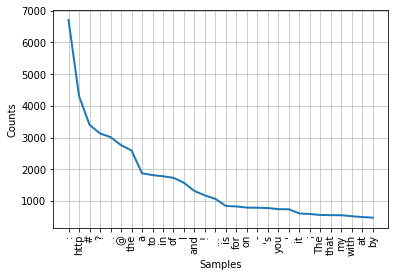

In [18]:
_ = fdist.plot(30, cumulative=False)
plt.show()

In [24]:
clean_allTokens = []

for token in clean_text:
    clean_allTokens += token

In [25]:
clean_fdist = FreqDist(clean_allTokens)

In [26]:
clean_fdist.most_common()

[('get', 438),
 ('like', 395),
 ('fire', 358),
 ('bomb', 232),
 ('new', 218),
 ('say', 201),
 ('people', 200),
 ('one', 198),
 ('time', 180),
 ('news', 179),
 ('burn', 179),
 ('make', 176),
 ('kill', 169),
 ('flood', 165),
 ('come', 161),
 ('crash', 161),
 ('disaster', 156),
 ('build', 156),
 ('emergency', 154),
 ('body', 154),
 ('attack', 154),
 ('video', 153),
 ('see', 149),
 ('home', 143),
 ('police', 142),
 ('would', 142),
 ('look', 141),
 ('take', 138),
 ('know', 137),
 ('think', 136),
 ('storm', 131),
 ('still', 129),
 ('train', 128),
 ('love', 123),
 ('back', 122),
 ('california', 121),
 ('day', 119),
 ('live', 118),
 ('suicide', 118),
 ('man', 117),
 ('watch', 117),
 ('want', 115),
 ('collapse', 115),
 ('bag', 115),
 ('work', 112),
 ('first', 108),
 ('scream', 105),
 ('let', 105),
 ('cause', 104),
 ('two', 104),
 ('world', 103),
 ('nuclear', 102),
 ('war', 101),
 ('today', 100),
 ('need', 100),
 ('drown', 100),
 ('wreck', 99),
 ('dead', 98),
 ('year', 98),
 ('plan', 96),
 ('ful

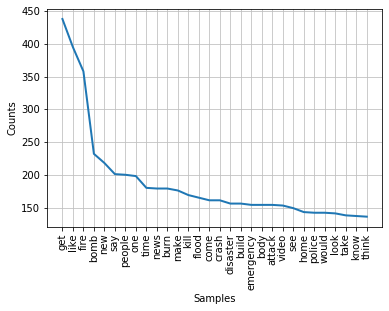

In [27]:
_ = clean_fdist.plot(30, cumulative=False)
plt.show()

In [32]:
from gensim.corpora.dictionary import Dictionary

In [33]:
dictionary = Dictionary(clean_text)

In [35]:
dictionary.token2id

{'allah': 0,
 'deeds': 1,
 'earthquake': 2,
 'forgive': 3,
 'may': 4,
 'reason': 5,
 'canada': 6,
 'fire': 7,
 'forest': 8,
 'near': 9,
 'ronge': 10,
 'sask': 11,
 'ask': 12,
 'evacuation': 13,
 'expect': 14,
 'notify': 15,
 'officer': 16,
 'order': 17,
 'place': 18,
 'residents': 19,
 'shelter': 20,
 'california': 21,
 'people': 22,
 'receive': 23,
 'wildfires': 24,
 'alaska': 25,
 'get': 26,
 'photo': 27,
 'pour': 28,
 'ruby': 29,
 'school': 30,
 'send': 31,
 'smoke': 32,
 'cafire': 33,
 'close': 34,
 'county': 35,
 'directions': 36,
 'due': 37,
 'hwy': 38,
 'lake': 39,
 'rockyfire': 40,
 'update': 41,
 'areas': 42,
 'cause': 43,
 'colorado': 44,
 'disaster': 45,
 'flash': 46,
 'flood': 47,
 'heavy': 48,
 'manitou': 49,
 'rain': 50,
 'spring': 51,
 'streets': 52,
 'hill': 53,
 'see': 54,
 'top': 55,
 'woods': 56,
 'across': 57,
 'build': 58,
 'emergency': 59,
 'happen': 60,
 'street': 61,
 'afraid': 62,
 'area': 63,
 'come': 64,
 'tornado': 65,
 'die': 66,
 'far': 67,
 'heat': 68,
 '

In [36]:
corpus = [dictionary.doc2bow(x) for x in clean_text]

In [39]:
corpus[0]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]

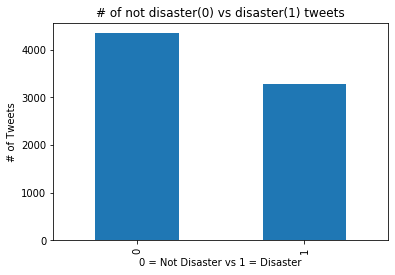

In [6]:
t = df.groupby('target')['target'].count()

_ = t.plot(x='id', y='target', kind='bar')
_ = plt.xlabel ('0 = Not Disaster vs 1 = Disaster')
_ = plt.ylabel ('# of Tweets')
_ = plt.title('# of not disaster(0) vs disaster(1) tweets')
plt.show()

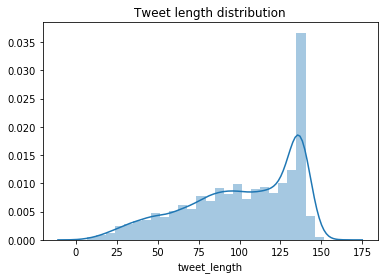

In [8]:
_ = sns.distplot(df['tweet_length']).set_title('Tweet length distribution')
plt.show()

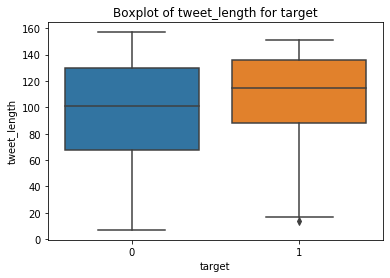

In [9]:
_ = sns.boxplot(data=df, x='target', y='tweet_length').set_title('Boxplot of tweet_length for target')
plt.show()

In [101]:
import spacy 

In [103]:
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [474]:
#lemmatize words
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_output = ''.join(lemmatizer.lemmatize(x, 'v') for x in word_tokenize(text))
    return lemmatized_output

In [475]:
clean = lemmatize(clean)
print ('Lemmatize:', clean)

Lemmatize: <generator object lemmatize.<locals>.<genexpr> at 0x1a21e83750>


In [476]:
#lowercase text
def lowercase(text):
    clean_text = text.lower()
    return clean_text

In [477]:
clean = lowercase(clean)
print ('Lowercase:',clean)

AttributeError: 'generator' object has no attribute 'lower'

In [469]:
#Remove URL and special characters
def remove_special_characters(text):
    text = re.sub(r'http.?//[^s]+[\s]?','',text) #Removes URLs
    text = re.sub(r'@\w+','', text)
    text = re.sub(r'<.*?>|[^a-zA-Z]',' ', text)

    return text

In [470]:
clean = remove_special_characters(clean)
print ('Remove special characters:',clean)

Remove special characters:   bbcmtd wholesale markets ablaze http     t co lhyxeohy c


In [446]:
#remove stopwords
stop_words = stopwords.words('english')
newWords = ['http','https', 'amp', 'cc', 'rt']
stop_words.extend(newWords)

def remove_stopwords(text):
    token = word_tokenize(text)
    remove_output = ' '.join(x for x in token if x not in stop_words)
    return remove_output

In [447]:
clean = remove_stopwords(clean)
print ('Remove stopwords:', clean)

Remove stopwords: wholesale markets ablaze


In [450]:
def tokenizer(text):
    token = word_tokenize(text)
    return token

In [451]:
clean = tokenizer(clean)
print ('Tokens:', clean)

Tokens: ['wholesale', 'market', 'ablaze']


In [462]:
#function to clean text
def text_cleaning(text):
    text = lemmatize(text)
    text = lowercase(text) 
    text = remove_stopwords(text)
    text = remove_special_characters(text)
    text = tokenizer(text)
    return text